In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.pyplot import cm # color stuff
from scipy.optimize import curve_fit
%matplotlib inline
plotmarkers=['^-', 'o-', 's-', '*-', 'd-', 'v-', 'h-', '>-', 'D-', 'H-', '<-', 'o-', 's-', '3-']

figsizeRanb=(5, 3.5)#(6,4) is default size in inches
plt.rcParams.update({'font.size': 11}) #default is 10

from matplotlib.ticker import AutoMinorLocator  #Stuff for ticks
minorLocator = AutoMinorLocator(2)

rootTP="/home/johann/Remote/imac"
rootMAC="/Users/jh"
rootTEST="/home/johann"
root=rootMAC

In [9]:
def plottofile(filename):
    pp = PdfPages('figures/'+filename+'.pdf')
    pp.savefig(bbox_inches='tight')
    pp.close()

In [44]:
def readSqDist(a,p,k,u,trigger,dt='0.0005',t='200'):
    data = []
    file = root+'/Documents/workspace-cpp/RanbSPS/Release/sim_data/'+trigger
    #file = "/Users/jh/Documents/Remote_PC/yoshi_scratch/RanbSPS/sim/Release/sim_data/"+trigger
    file += '/dt'+dt+'/t'+str(t)+'/a'+str(a)+'/p'+str(p)+'/k'+k+'/u'+str(u)+'/Coordinates/squareDistances.txt'
    lens=[]
    with open(file, 'r') as f:
        for line in f:
            lines = [float(i) for i in line.split()]
            data.append(lines)
            lens.append(len(lines))
    #print(min(lens), lens.index(min(lens)))
    data=(np.asarray(data))
    return  data

## Check local rod density


#### TODO D over sd for u=10 and -10

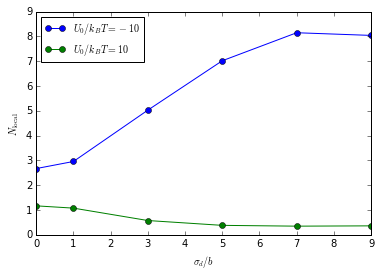

In [4]:
a=0; p=5; t=200; k='2.500';
us=[-10, 10]
ds=[0,1,3,5,7,9]
#f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
#f.subplots_adjust(hspace=0)#make plots touch vertically
for u in us:
    Ns=[]
    for d in ds:
        trigger='rand/d'+str(d)+'/fixb'
        kx=k
        if u==0:
            kx='1.000'
        data=readSqDist(a,p,k=kx,u=u,trigger=trigger,t=t,dt="0.0001")
        distances=np.sqrt(data[:,1:])/10.
        # Count distances that are smaller than b/2 = 0.5 and divide by number of recorded steps
        Nlocal=len(distances[ np.where( distances < 0.5 ) ])/len(distances)
        #print("For U=",u, "\nAvg number of Rods in sphere around tracer:",Nlocal)
        Ns.append(Nlocal)
    plt.plot(ds,Ns,'o-',label=r"$U_0/k_BT="+str(u)+"$")
plt.ylabel(r"$N_\mathrm{local}$")
plt.xlabel(r"$\sigma_d/b$")
plt.legend(loc=0,fontsize = 'medium')
plt.show()

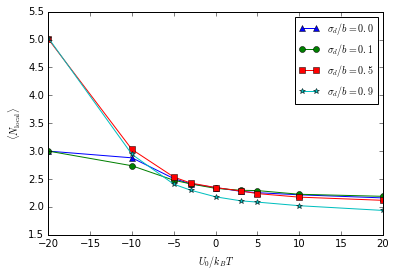

In [5]:
#TODO !!!!!!!!!! include u=-20 here!

a=0; p=1; t=200; k='0.500';
us=[-20,-10, -5, -3, 0, 3, 5, 10, 20]
ds=[0,1,5,9]
#f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
#f.subplots_adjust(hspace=0)#make plots touch vertically
for i, d in enumerate(ds):
    trigger='rand/d'+str(d)+'/fixb'
    Ns=[]
    for u in us:
        kx=k
        if u==0:
            kx='1.000'
        data=readSqDist(a,p,k=kx,u=u,trigger=trigger,t=t,dt="0.0001")
        distances=np.sqrt(data[:,1:])/10.
        # Count distances that are smaller than b/2 = 0.5 and divide by number of recorded steps
        Nlocal=len(distances[ np.where( distances < 0.5 ) ])/len(distances)
        #print("For U=",u, "\nAvg number of Rods in sphere around tracer:",Nlocal)
        Ns.append(Nlocal)
    plt.plot(us,Ns,plotmarkers[i],label=r"$\sigma_d/b="+str(d/10.)+"$")
plt.ylabel(r"$\langle N_\mathrm{local} \rangle$")
plt.xlabel(r"$U_0/k_BT$")
plt.legend(fontsize = 'medium')
plottofile('N_over_U_vary_d_p1_k0.500')

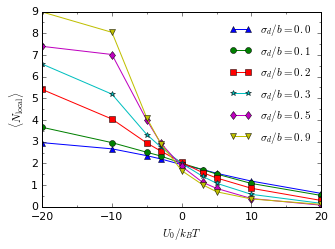

In [53]:
## TODO reload with better data

a=0; p=5; t=200; k='2.500';
us=[-20,-10, -5, -3, 0, 3, 5, 10, 20]
ds=[0,1,2,3,5,9]
#f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
#f.subplots_adjust(hspace=0)#make plots touch vertically
fig, ax = plt.subplots(figsize=figsizeRanb)
for i, d in enumerate(ds):
    trigger='rand/d'+str(d)+'/fixb'
    Ns=[]
    for u in us:
        kx=k
        if u==0:
            kx='1.000'
        #print("sd =",d," -- u =",u)
        data=readSqDist(a,p,k=kx,u=u,trigger=trigger,t=t,dt="0.0001")
        #print(data)
        distances=np.sqrt(data[:,1:])/10.
        # Count distances that are smaller than b/2 = 0.5 and divide by number of recorded steps
        Nlocal=len(distances[ np.where( distances < 0.5 ) ])/len(distances)#/(4./3*np.pi*0.5**3)
        #print("For U=",u, "\nAvg number of Rods in sphere around tracer:",Nlocal)
        Ns.append(Nlocal)
    plt.plot(us,Ns,plotmarkers[i],label=r"$\sigma_d/b="+str(d/10.)+"$")
ax.xaxis.set_minor_locator(minorLocator)
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.locator_params(axis='x',nbins=7) #maximum number of xticks
plt.ylabel(r"$\langle N_\mathrm{local} \rangle$")
plt.xlabel(r"$U_0/k_BT$")
plt.legend(fontsize = 'medium',frameon=False)
plottofile('N_over_U_vary_d_p5_k2.500')

#### Conclusion
- There are strong qualitative differences between the p=1 and p=5 case. For the former, the lines for different sd are qualitatively and quantitatively alike. In the latter case, i.e. for larger volume fractions/particle diameters p closer to b, the lines for the ordered and disordered lattice are qualitatively and quantitatively different, i.e. the geometry of the lattice becomes very important.
- For the disordered case and larger p=5 the particle has a very strong tendency to stay close to multiple attractive rods, i.e. the tracer travels into regions with a large local phi
- For both p=1 and p=5 as well as the unordered and ordered lattice the particle has a tendency to move into regions of larger local phi for attractive $U_0<0$. This effect is much increased for the unordered system for p=5.

### Data for ranU

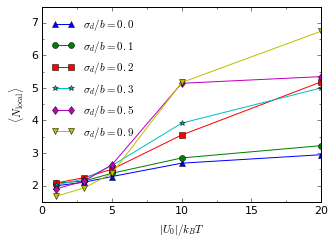

In [49]:
a=0; p=5; t=200; k='2.500';
us=[1, 3, 5, 10, 20]
ds=[0,1,2,3, 5,9]
#f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
#f.subplots_adjust(hspace=0)#make plots touch vertically
fig, ax = plt.subplots(figsize=figsizeRanb)
for i, d in enumerate(ds):
    trigger='ranU/rand/d'+str(d)+'/fixb'
    Ns=[]
    for u in us:
        kx=k
        if u==0:
            kx='1.000'
        data=readSqDist(a,p,k=kx,u=u,trigger=trigger,t=t,dt="0.0001")
        distances=np.sqrt(data[:,1:])/10.
        # Count distances that are smaller than b/2 = 0.5 and divide by number of recorded steps
        Nlocal=len(distances[ np.where( distances < 0.5 ) ])/len(distances)
        #print("For U=",u, "\nAvg number of Rods in sphere around tracer:",Nlocal)
        Ns.append(Nlocal)
    plt.plot(us,Ns,plotmarkers[i],label=r"$\sigma_d/b="+str(d/10.)+"$")
ax.xaxis.set_minor_locator(minorLocator)
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.locator_params(axis='x',nbins=7) #maximum number of xticks
plt.ylabel(r"$\langle N_\mathrm{local} \rangle$")
plt.xlabel(r"$|U_0|/k_BT$")
plt.ylim([1.5,7.5])
plt.legend(loc=0,fontsize = 'medium',frameon=False)
plottofile('N_over_U_vary_d_p5_k2.500_ranU')

#### Conclusion
this seems to work nicely, but I have not recorded the distancefiles consequently, so I will have to re-run some simulations. It should be enough though to run them for an hour or so.

In particular, I can definitely use this method to compare the ranU data to the homogeneous charge data.

In [ ]:
a=0; p=5; d=9; t=200; k='2.500';
trigger='setPBC/rand/d'+str(d)+'/fixb'
us=[-10]
#f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
#f.subplots_adjust(hspace=0)#make plots touch vertically
datas=[]
for u in us:
    data=readSqDist(a,p,k,u,trigger,t=t,dt="0.0001")
    distances=np.sqrt(data[:,1:])/10.
    datas.append(distances)
# Count distances that are smaller than b/2 = 0.5
print(distances)
print(len(distances[ np.where( distances < 0.5 ) ])/len(distances))

# Plot distance histograms
## Nearest neighbors
This measure is similar to what Johannson and Lofroth use in their paper Johansson1991 to determine the pore size distribution

[ 0.11301442  0.33677629  0.46213543 ...,  0.22543199  0.3212612
  0.46417643]


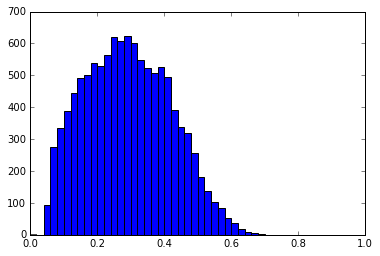

[ 0.1715699   0.19238532  0.30012857 ...,  0.18950361  0.13990954
  0.26264217]


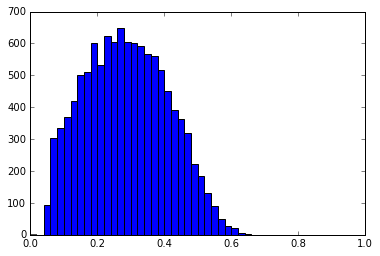

[ 0.20602126  0.44494337  0.29278258 ...,  0.3902654   0.14279212
  0.17941926]


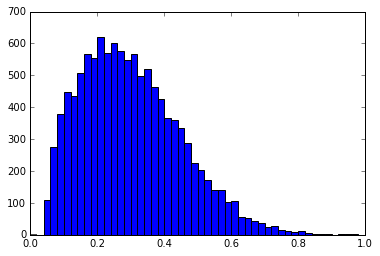

In [76]:
a=0; p=1; t=200; k='1.000';
us=[0]
#f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
#f.subplots_adjust(hspace=0)#make plots touch vertically
for d in [0,1,9]:
    trigger='rand/d'+str(d)+'/fixb'
    Ns=[]
    for u in us:
        data=readSqDist(a,p,k=k,u=u,trigger=trigger,t=t,dt="0.0001")
        distances=np.sqrt(data[:,1:])/10.
        # Count distances that are smaller than b/2 = 0.5 and divide by number of recorded steps
        smallDist=distances.min(axis=1)
        print(smallDist)
    plt.hist(smallDist,bins=np.arange(0,1,0.02))
    plt.show()

0.608886163055


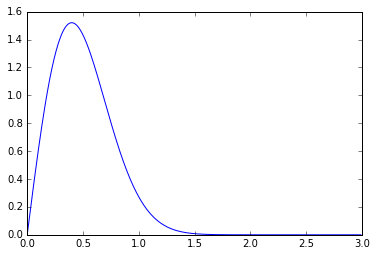

In [9]:
def fexp(x,b):
    R=b/2.
    return x*np.pi/(2*R**2)  *  np.exp(-(x/R)**2 * np.pi/4.)
print(fexp(0.1,1))
xs=np.arange(0,3,0.01)
plt.plot(xs,fexp(xs,1))

## All distances
#### d=9 vary U_0

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


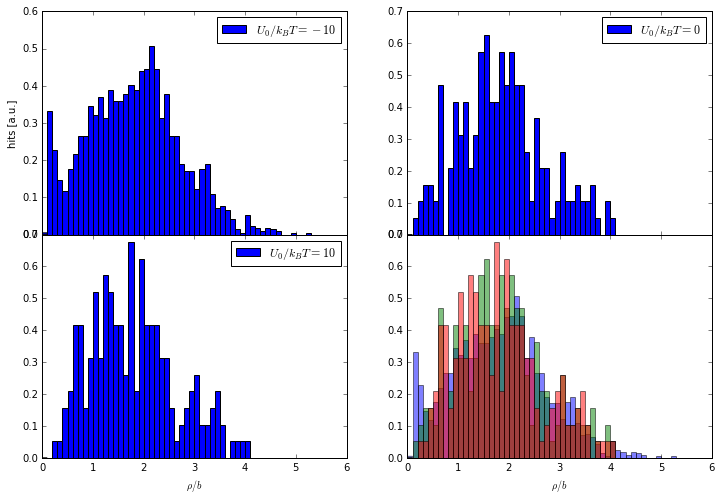

In [3]:
a=1; p=1; d=9; t=11; k='1.000';
trigger='rand/d'+str(d)+'/fixb'
us=[-10,0,10]
bins=np.arange(0,5.5,0.1)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
f.subplots_adjust(hspace=0)#make plots touch vertically
datas=[]
for u in us:
    data=readSqDist(a,p,k,u,trigger,t=t,dt="0.0001")
    distances=np.sqrt(data[:,1:].flatten())
    datas.append(distances/10.)
datam10= ax1.hist(datas[0],bins=bins,label='$U_0/k_BT=-10$',normed=1)
ax2.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',normed=1)
ax3.hist(datas[2],bins=bins,label='$U_0/k_BT=10$',normed=1)
ax4.hist(datas[0],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[2],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax3.set_xlabel(r'$\rho/b$')
ax4.set_xlabel(r'$\rho/b$')
ax1.set_ylabel('hits [a.u.]')
ax1.legend()
ax2.legend()
ax3.legend()
f.show()

### Conclusion
For the attractive case with a sd $\check{d}$, the particle has a tendency to remain very close to at least one rod. The difference between the neutral and the repulsive case is not so pronounced, but there is a slightly smaller probability for small $\rho<0.4$. At larger distances, the differences between all three cases become negligible. The density of neighboring rods in the unit cell is maximal for a distance of about $2b$.

In [18]:
print(datam10[1])

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4]


In [21]:
k=0.1
tot=0
for i, bin in enumerate(datam10[1]):
    if bin<k:
        tot+=datam10[0][i]
print(tot)

0.00473709142586


## d = 3 vary U_0

/usr/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


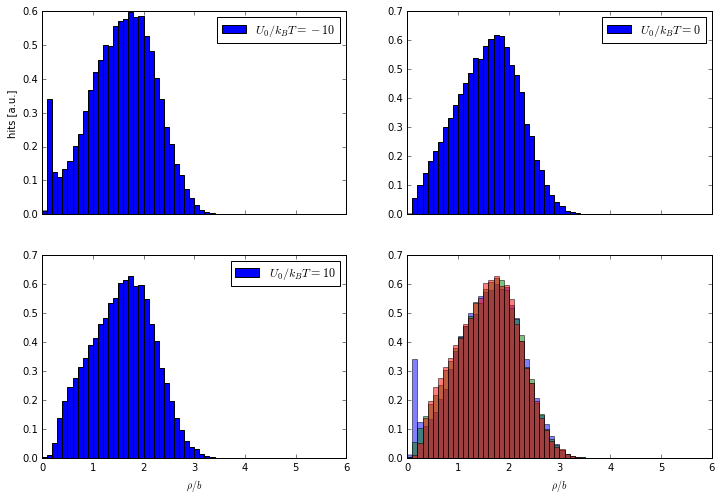

In [64]:
a=1; p=1; d=3; t=11; k='1.000';
trigger='rand/d'+str(d)+'/fixb'
us=[-10,0,10]
bins=np.arange(0,5.5,0.1)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
f.subplots_adjust(hspace=0)#make plots touch vertically
datas=[]
for u in us:
    data=readSqDist(a,p,k,u,trigger,t=t)
    distances=np.sqrt(data[:,1:].flatten())
    datas.append(distances/10.)
ax1.hist(datas[0],bins=bins,label='$U_0/k_BT=-10$',normed=1)
ax2.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',normed=1)
ax3.hist(datas[2],bins=bins,label='$U_0/k_BT=10$',normed=1)
ax4.hist(datas[0],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[2],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax3.set_xlabel(r'$\rho/b$')
ax4.set_xlabel(r'$\rho/b$')
ax1.set_ylabel('hits [a.u.]')
ax1.legend()
ax2.legend()
ax3.legend()
f.show()

### Conclusion:
The distribution goes to zero at a smaller $\rho\approx 3.5b$, in contrast to the $\check{d}=0.9b$ case, where the distribution goes to zero at  $\rho\approx 5b$. The distance between one corner of the central cell and opposite corner of the simulation box is $\sqrt{2} 2 b = 2.8 b$. 

We again see a clear increase in probability to be very close to a rod for the attractive case, but the maximum of about $0.34$  is less pronounced compared to the $\check{d}=0.9b$ case, where is has a magnitude of about $0.44$. This indicates that for $\check{d}=0.3b$ the tracer is only close to a maximum of one rod at a time, whereas for $\check{d}=0.9b$ the tracer is often close to more than one rod. 

\textit{NOTE:} I could analyze this further, by checking how many $\rho<2*(a+p)$ during the simulation.

## d=0 vary U_0

/usr/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


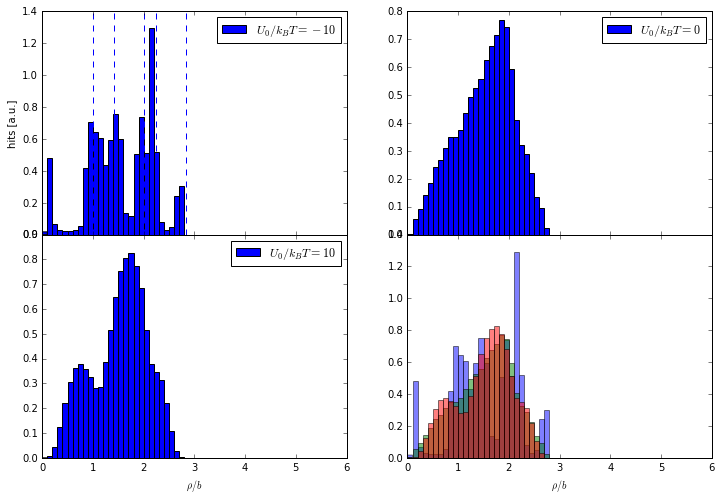

In [74]:
a=1; p=1; d=0; t=11; k='1.000';
trigger='rand/d'+str(d)+'/fixb'
us=[-10,0,10]
bins=np.arange(0,5.5,0.1)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
f.subplots_adjust(hspace=0)#make plots touch vertically
datas=[]
for u in us:
    data=readSqDist(a,p,k,u,trigger,t=t)
    distances=np.sqrt(data[:,1:].flatten())
    datas.append(distances/10.)
ax1.hist(datas[0],bins=bins,label='$U_0/k_BT=-10$',normed=1)
ax1.axvline(x=1,ls='dashed'); ax1.axvline(x=np.sqrt(2),ls='dashed'); ax1.axvline(x=np.sqrt(5),ls='dashed');
ax1.axvline(x=2,ls='dashed'); ax1.axvline(x=np.sqrt(2)*2,ls='dashed');
ax2.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',normed=1)
ax3.hist(datas[2],bins=bins,label='$U_0/k_BT=10$',normed=1)
ax4.hist(datas[0],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[2],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax3.set_xlabel(r'$\rho/b$')
ax4.set_xlabel(r'$\rho/b$')
ax1.set_ylabel('hits [a.u.]')
ax1.legend()
ax2.legend()
ax3.legend()
f.show()

### Conclusion:
In the attractive case the tracer has a tendency to stay very close to one rod, hence, one sees maxima at the radial distances between two rods in the symmetric system, i.e. $\rho = b, \sqrt{2} b, 2b, \sqrt{5}b, \sqrt{2}\cdot 2 b$. These distances are inidcated with dashed vertical lines.

In the repulsive case the tracer tends to be in the center of the cell, hence one sees a maximum at $\rho=\sqrt{2}\cdot0.5b$ and at $\rho=\sqrt{2}\cdot1.5b$.

In the neutral case the tracer can travel anywhere in the central cell.

## TODO:
- I could normalize the histograms for $U_0\neq0$ by dividing them by the histogram data for $U_0=0$. *Done*: Not that interesting (see below)
- I could analyze the attractive case data further, by checking how many $\rho<2*(a+p)$ during the simulation, to gauge whether the particle has a tendency to be close to two or more rods.

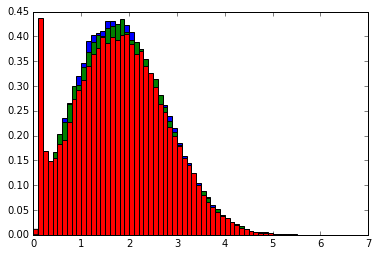

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide


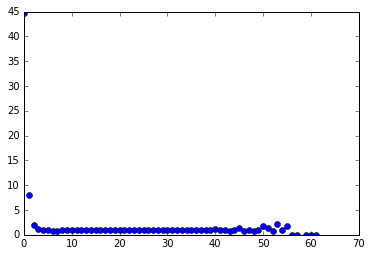

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in true_divide


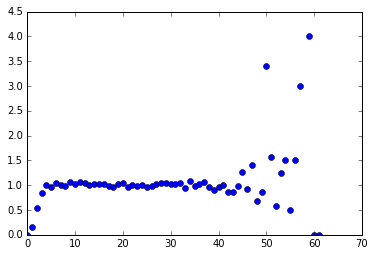

In [85]:
a=1; p=1; d=9; t=11; k='1.000'; u=10;
trigger='rand/d'+str(d)+'/fixb'
data=readSqDist(a,p,k,u,trigger,t=t)
distances=np.sqrt(data[:,1:].flatten())
bins=np.arange(0,7,0.1)
countsu10,bins,bars=plt.hist(distances/10.,bins=bins,label='$U_0/k_BT=0$',normed=True)
u=0;
data=readSqDist(a,p,k,u,trigger,t=t)
distances=np.sqrt(data[:,1:].flatten())
bins=np.arange(0,7,0.1)
countsu0,bins,bars=plt.hist(distances/10.,bins=bins,label='$U_0/k_BT=0$',normed=True)
u=-10;
data=readSqDist(a,p,k,u,trigger,t=t)
distances=np.sqrt(data[:,1:].flatten())
bins=np.arange(0,7,0.1)
countsum10,bins,bars=plt.hist(distances/10.,bins=bins,label='$U_0/k_BT=0$',normed=True)
plt.show()
plt.plot(countsum10/countsu0,'o')
plt.show()
plt.plot(countsu10/countsu0,'o')
plt.show()